In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
import os
# import seaborn as sns
# import scipy.stats as stats
import unittest

In [2]:
df_battery = pd.read_csv('../data/Battery_Dataset.csv')

In [3]:
import csv
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold 
import math

import sklearn
import statistics as stcs
import scipy.stats as stats


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,scale,MinMaxScaler
from scipy.stats import uniform,expon
from sklearn.model_selection import cross_val_score
from time import time
from sklearn.preprocessing import OneHotEncoder


In [4]:
#One hot encoding (alphebetical order)
ohe = OneHotEncoder()
ACE = df_battery.loc[:,['anode','cathode','electrolyte']]
ACE = ohe.fit_transform(ACE)
ACE = pd.DataFrame(ACE.toarray())

ACE_col_name = ['A1','C1','C2','C3','E1','E2','E3']
for i in range(len(ACE.columns)):
    ACE = ACE.rename({ACE.columns[i]: ACE_col_name[i]}, axis=1) 
    
df_battery = pd.concat([ACE, df_battery],axis=1)

In [5]:
df_battery.columns

Index(['A1', 'C1', 'C2', 'C3', 'E1', 'E2', 'E3', 'cell_id', 'study', 'Cycles ',
       'anode', 'cathode', 'electrolyte', 'Cycle', 'temperature', 'min_soc',
       'max_soc', 'charge_crate', 'discharge_crate', 'capacity_ah',
       'form_factor', 'Start_Time', 'End_Time', 'Test_Time (s)',
       'Min_Current (A)', 'Max_Current (A)', 'Min_Voltage (V)',
       'Max_Voltage (V)', 'Charge_Capacity (Ah)', 'Discharge_Capacity (Ah)',
       'Charge_Energy (Wh)', 'Discharge_Energy (Wh)',
       'Coulombic_Efficiency (%)', 'Energy_Efficiency (%)'],
      dtype='object')

In [6]:
data = df_battery

np.random.seed(66)
def data_split (data, test_ratio):
    df = pd.DataFrame(data)
    total_row = df.shape[0]
    test_row = round(total_row * test_ratio)
    train_row = total_row - test_row
    indices = np.random.permutation(total_row)
    train_indx, test_idx = indices[:train_row], indices[train_row:]
    train,test = df.iloc[train_indx,:], df.iloc[test_idx,:]
    X_test = test[['A1','C1','C2','C3','E1','E2','E3','Cycle','temperature','discharge_crate']]
#    y_test = test[['Charge_Capacity (Ah)']]
#    y_test = test[['Discharge_Capacity (Ah)']]
#    y_test = test[['Charge_Energy (Wh)']]
#    y_test = test[['Discharge_Energy (Wh)']]
    y_test = test[['Coulombic_Efficiency (%)']]
#    y_test = test[['Energy_Efficiency (%)']]
    X_train = train[['A1','C1','C2','C3','E1','E2','E3','Cycle','temperature','discharge_crate']]
#    y_train = train[['Charge_Capacity (Ah)']]
#    y_train = train[['Discharge_Capacity (Ah)']]
#    y_train = train[['Charge_Energy (Wh)']]
#    y_train = train[['Discharge_Energy (Wh)']]
    y_train = train[['Coulombic_Efficiency (%)']]
#    y_train = train[['Energy_Efficiency (%)']]
    return train,test,X_train,y_train,X_test,y_test
    
train,test,X_train,y_train,X_test,y_test = data_split(data,0.2)
#print(X_train)

In [7]:
#k-fold cross validation
kf = KFold(n_splits=10,random_state =66,shuffle= True)
#print(X_test,y_test,X_train,y_train)

In [8]:
rand_para = {'learning_rate':np.logspace(-1,-3)}

reg=GradientBoostingRegressor(random_state = 1001,max_depth=3,n_estimators=4369,min_samples_leaf=1,min_samples_split=2,max_features=7)

n_iteration = 10000
Scoring = ['explained_variance','neg_mean_squared_error',"r2"]
random_search = RandomizedSearchCV(reg,param_distributions=rand_para,cv =5,scoring=Scoring,
                                   error_score=0,random_state=1001,return_train_score=True,n_jobs=-1,n_iter=n_iteration,verbose=10,refit=False)


random_search.fit(X_train,y_train)

results_10_fold = pd.DataFrame(random_search.cv_results_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 50 is smaller than n_iter=10000. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV 5/5; 1/50] START learning_rate=0.1..........................................
[CV 5/5; 1/50] END learning_rate=0.1; explained_variance: (train=0.557, test=-6.950) neg_mean_squared_error: (train=-0.405, test=-1.094) r2: (train=0.557, test=-6.964) total time=   2.1s
[CV 5/5; 2/50] START learning_rate=0.09102981779915217..........................
[CV 5/5; 2/50] END learning_rate=0.09102981779915217; explained_variance: (train=0.557, test=-6.727) neg_mean_squared_error: (train=-0.406, test=-1.065) r2: (train=0.557, test=-6.748) total time=   1.9s
[CV 3/5; 4/50] START learning_rate=0.07543120063354619..........................
[CV 3/5; 4/50] END learning_rate=0.07543120063354619; explained_variance: (train=0.554, test=-7.838) neg_mean_squared_error: (train=-0.411, test=-1.003) r2: (train=0.554, test=-7.866) total time=   2.0s
[CV 1/5; 6/50] START learning_rate=0.06250551925273973..........................
[CV 1/5; 6/50] END learning_rate=0.06250551925273973; explained_variance: (train=0.

[CV 3/5; 2/50] START learning_rate=0.09102981779915217..........................
[CV 3/5; 2/50] END learning_rate=0.09102981779915217; explained_variance: (train=0.555, test=-8.066) neg_mean_squared_error: (train=-0.409, test=-1.027) r2: (train=0.555, test=-8.077) total time=   2.1s
[CV 3/5; 3/50] START learning_rate=0.08286427728546843..........................
[CV 3/5; 3/50] END learning_rate=0.08286427728546843; explained_variance: (train=0.554, test=-7.896) neg_mean_squared_error: (train=-0.410, test=-1.009) r2: (train=0.554, test=-7.922) total time=   1.9s
[CV 1/5; 5/50] START learning_rate=0.06866488450043001..........................
[CV 1/5; 5/50] END learning_rate=0.06866488450043001; explained_variance: (train=0.413, test=-4.218) neg_mean_squared_error: (train=-0.546, test=-0.507) r2: (train=0.413, test=-4.636) total time=   2.0s
[CV 3/5; 6/50] START learning_rate=0.06250551925273973..........................
[CV 3/5; 6/50] END learning_rate=0.06250551925273973; explained_var

/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

[CV 2/5; 1/50] START learning_rate=0.1..........................................
[CV 2/5; 1/50] END learning_rate=0.1; explained_variance: (train=0.819, test=-0.211) neg_mean_squared_error: (train=-0.033, test=-3.702) r2: (train=0.819, test=-0.212) total time=   2.3s
[CV 5/5; 3/50] START learning_rate=0.08286427728546843..........................
[CV 5/5; 3/50] END learning_rate=0.08286427728546843; explained_variance: (train=0.556, test=-6.573) neg_mean_squared_error: (train=-0.406, test=-1.042) r2: (train=0.556, test=-6.586) total time=   1.9s
[CV 2/5; 5/50] START learning_rate=0.06866488450043001..........................
[CV 2/5; 5/50] END learning_rate=0.06866488450043001; explained_variance: (train=0.815, test=-0.183) neg_mean_squared_error: (train=-0.034, test=-3.619) r2: (train=0.815, test=-0.185) total time=   2.1s
[CV 5/5; 6/50] START learning_rate=0.06250551925273973..........................
[CV 5/5; 6/50] END learning_rate=0.06250551925273973; explained_variance: (train=0.

[CV 2/5; 2/50] START learning_rate=0.09102981779915217..........................
[CV 2/5; 2/50] END learning_rate=0.09102981779915217; explained_variance: (train=0.818, test=-0.198) neg_mean_squared_error: (train=-0.033, test=-3.663) r2: (train=0.818, test=-0.199) total time=   2.2s
[CV 1/5; 4/50] START learning_rate=0.07543120063354619..........................
[CV 1/5; 4/50] END learning_rate=0.07543120063354619; explained_variance: (train=0.413, test=-3.441) neg_mean_squared_error: (train=-0.546, test=-0.425) r2: (train=0.413, test=-3.729) total time=   1.9s
[CV 4/5; 5/50] START learning_rate=0.06866488450043001..........................
[CV 4/5; 5/50] END learning_rate=0.06866488450043001; explained_variance: (train=0.362, test=0.193) neg_mean_squared_error: (train=-0.544, test=-0.336) r2: (train=0.362, test=0.139) total time=   2.1s
[CV 1/5; 7/50] START learning_rate=0.05689866029018296..........................
[CV 1/5; 7/50] END learning_rate=0.05689866029018296; explained_varia

In [9]:
GBM_model =GradientBoostingRegressor(max_depth=3,
                                        n_estimators=4369,
                                        min_samples_leaf=1,
                                        min_samples_split=2,
                                        max_features=7,
                                        learning_rate=0.049,
                                        random_state = 66)
for train_index, test_index in kf.split(X_train):
    X_training, X_validate = X_train.iloc[train_index], X_train.iloc[test_index]
    y_training, y_validate = y_train.iloc[train_index], y_train.iloc[test_index]
   
    np.random.seed(66)
    GBM_model.fit(X_training,y_training)
    y_train_predicted = GBM_model.predict(X_validate)
    
#calculate train RMSE    
MSE_train = mean_squared_error(y_train_predicted, y_validate)
RMSE_train = math.sqrt(MSE_train)
print(RMSE_train)

/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

0.22130743479764411


In [10]:
np.random.seed(66)
GBM_model.fit(X_train,y_train)
y_predict = GBM_model.predict(X_test)
#print(y_predict)
MSE_test = mean_squared_error(y_predict, y_test)
RMSE_test = math.sqrt(MSE_test)
print(RMSE_test)

/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.3715525114289815


In [11]:
r2_score(y_predict, y_test)

-18.96856792011028

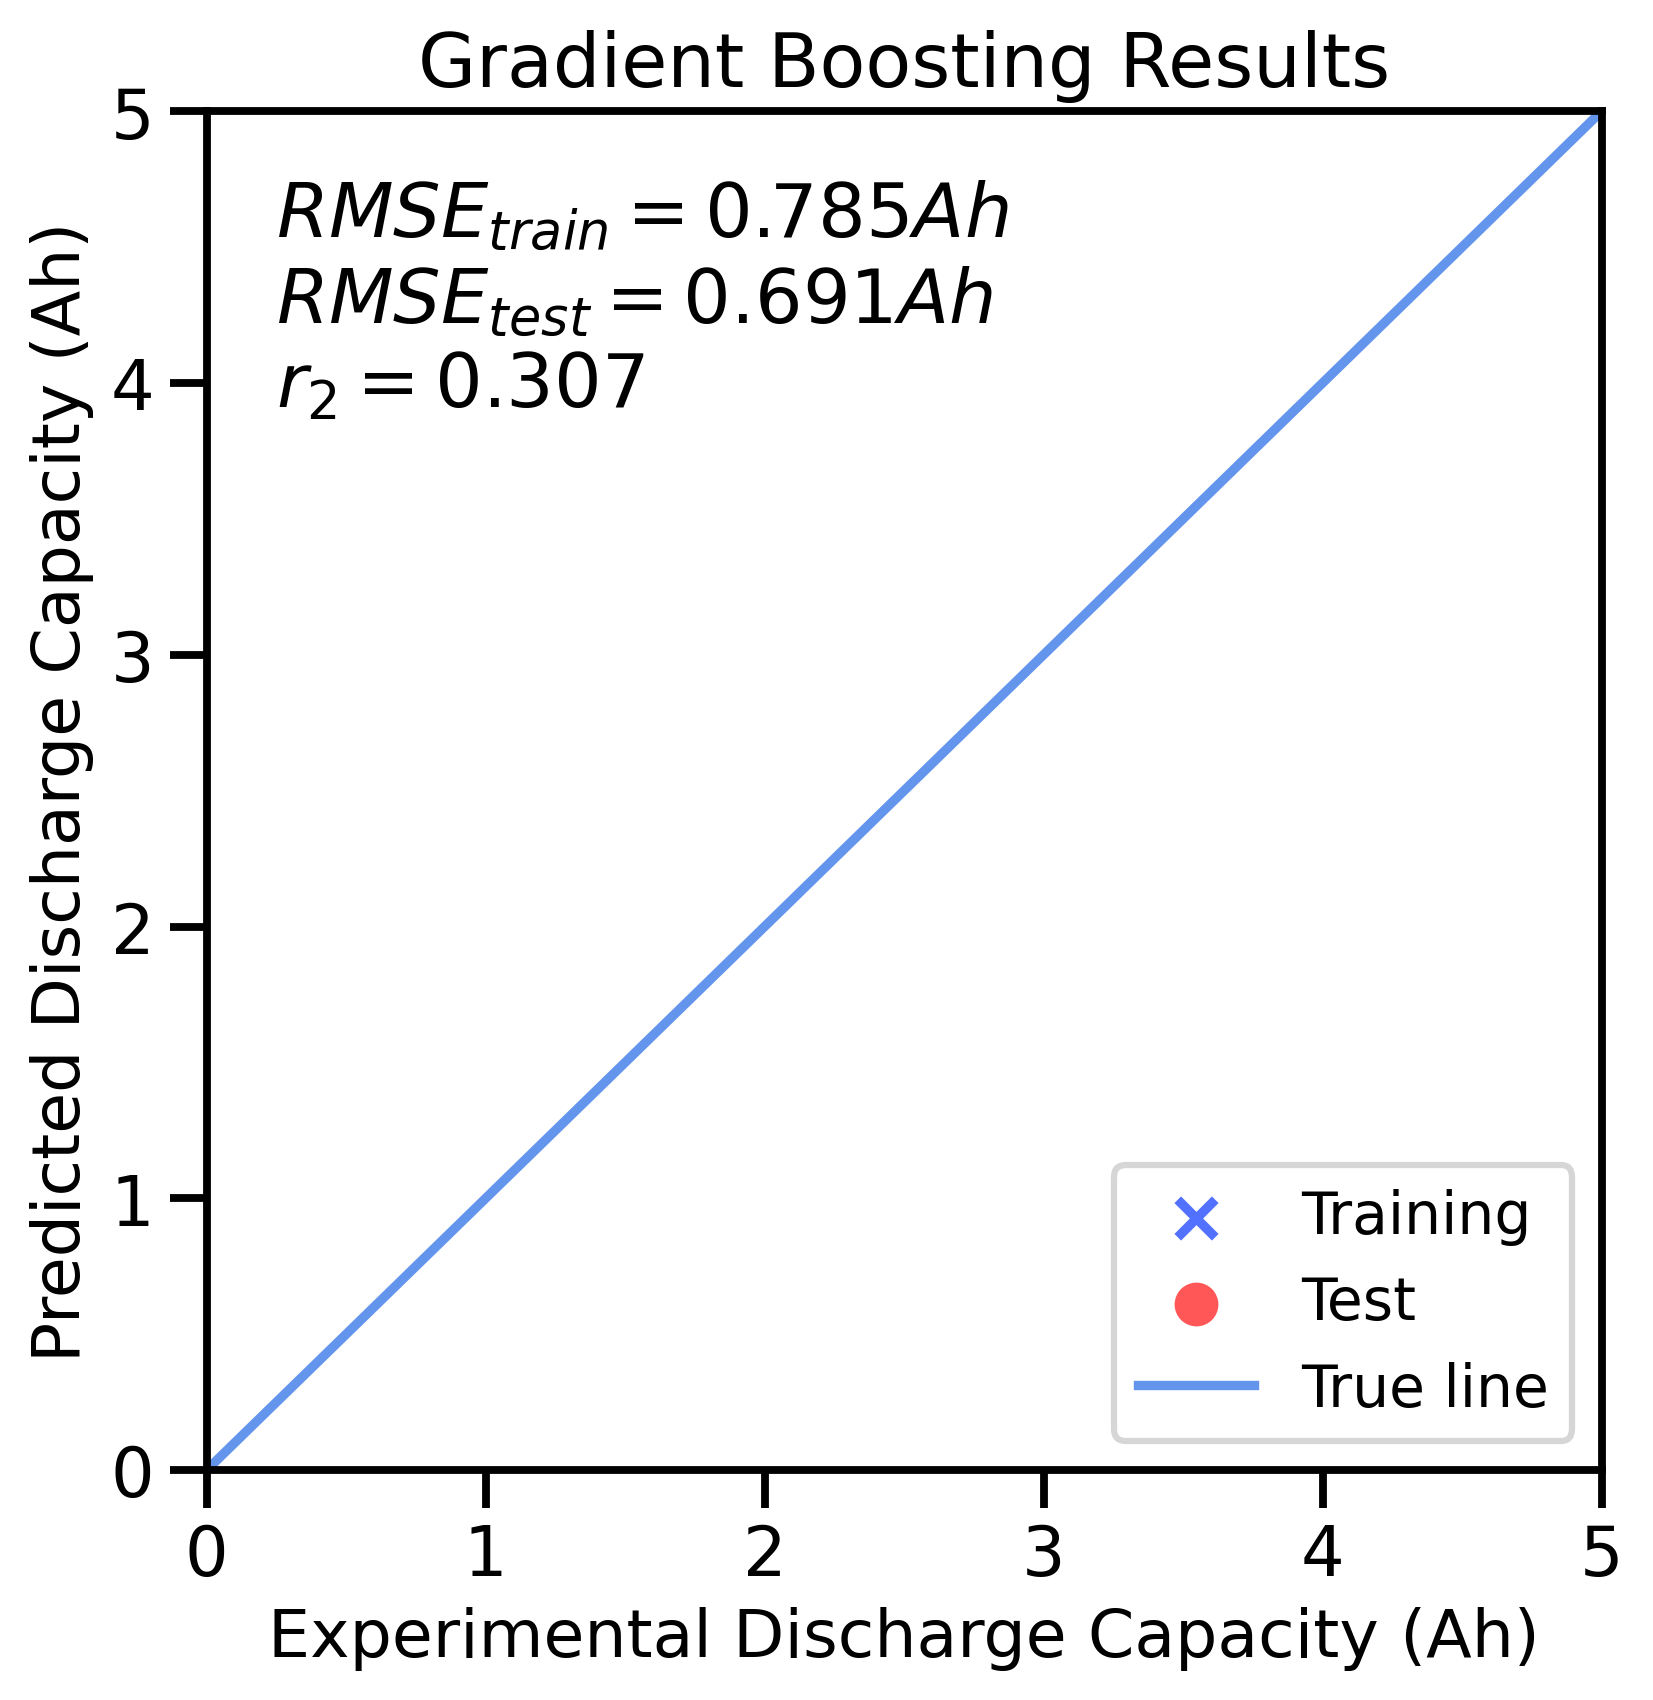

/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

[CV 1/5; 45/50] END learning_rate=0.001599858719606059; explained_variance: (train=0.274, test=-0.569) neg_mean_squared_error: (train=-0.675, test=-0.149) r2: (train=0.274, test=-0.651) total time=   3.4s
[CV 4/5; 46/50] START learning_rate=0.0014563484775012444.......................
[CV 4/5; 46/50] END learning_rate=0.0014563484775012444; explained_variance: (train=0.272, test=-0.041) neg_mean_squared_error: (train=-0.621, test=-0.409) r2: (train=0.272, test=-0.048) total time=   3.1s
[CV 1/5; 48/50] START learning_rate=0.0012067926406393288.......................
[CV 1/5; 48/50] END learning_rate=0.0012067926406393288; explained_variance: (train=0.257, test=-0.401) neg_mean_squared_error: (train=-0.691, test=-0.133) r2: (train=0.257, test=-0.478) total time=   3.4s
[CV 4/5; 49/50] START learning_rate=0.0010985411419875584.......................
[CV 4/5; 49/50] END learning_rate=0.0010985411419875584; explained_variance: (train=0.260, test=-0.023) neg_mean_squared_error: (train=-0.63

/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

[CV 4/5; 48/50] END learning_rate=0.0012067926406393288; explained_variance: (train=0.264, test=-0.028) neg_mean_squared_error: (train=-0.627, test=-0.403) r2: (train=0.264, test=-0.034) total time=   3.7s
[CV 2/5; 50/50] START learning_rate=0.001.......................................
[CV 2/5; 50/50] END learning_rate=0.001; explained_variance: (train=0.491, test=-0.025) neg_mean_squared_error: (train=-0.093, test=-3.167) r2: (train=0.491, test=-0.037) total time=   3.2s


/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

[CV 5/5; 48/50] END learning_rate=0.0012067926406393288; explained_variance: (train=0.339, test=-1.430) neg_mean_squared_error: (train=-0.605, test=-0.338) r2: (train=0.339, test=-1.456) total time=   3.7s
[CV 3/5; 50/50] START learning_rate=0.001.......................................
[CV 3/5; 50/50] END learning_rate=0.001; explained_variance: (train=0.312, test=-1.148) neg_mean_squared_error: (train=-0.633, test=-0.246) r2: (train=0.312, test=-1.176) total time=   3.0s


/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

[CV 2/5; 44/50] END learning_rate=0.001757510624854793; explained_variance: (train=0.557, test=-0.030) neg_mean_squared_error: (train=-0.081, test=-3.185) r2: (train=0.557, test=-0.043) total time=   3.5s
[CV 5/5; 45/50] START learning_rate=0.001599858719606059........................
[CV 5/5; 45/50] END learning_rate=0.001599858719606059; explained_variance: (train=0.361, test=-1.687) neg_mean_squared_error: (train=-0.585, test=-0.373) r2: (train=0.361, test=-1.711) total time=   3.1s
[CV 3/5; 47/50] START learning_rate=0.0013257113655901094.......................
[CV 3/5; 47/50] END learning_rate=0.0013257113655901094; explained_variance: (train=0.334, test=-1.423) neg_mean_squared_error: (train=-0.613, test=-0.277) r2: (train=0.334, test=-1.451) total time=   3.3s
[CV 1/5; 49/50] START learning_rate=0.0010985411419875584.......................
[CV 1/5; 49/50] END learning_rate=0.0010985411419875584; explained_variance: (train=0.252, test=-0.353) neg_mean_squared_error: (train=-0.695

/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_context('talk')
figure(figsize=(6, 6), dpi=300)

plt.axis([0,5,0,5])
plt.scatter(x = y_validate, y = y_train_predicted, marker = 'x', c='#5271FF',label='Training')
plt.scatter(x = y_test, y = y_predict, c='#FF5757',label='Test')
plt.plot([0,5],[0,5],label ='True line',c='cornflowerblue')
plt.legend(loc='lower right', fontsize = 14)
plt.title(label='Gradient Boosting Results')

plt.xlabel(r'Experimental Discharge Capacity (Ah)', fontsize = 16)
plt.ylabel(r'Predicted Discharge Capacity (Ah)', fontsize = 16)
plt.text(0.25, 3.6, r'$RMSE_{train}=0.785Ah$'+'\n'+r'$RMSE_{test}=0.691Ah$' +'\n'+ r'$r_{2}=0.307$' +"\n")
#plt.savefig('Gradient_Boosting-Predicted-vs-test.png',dpi=600)
plt.show()
